In [18]:
from pycaret.regression import *
import pandas as pd
import numpy as np

In [19]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [20]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
exp_reg101 = setup(data = train, target = 'SalePrice', session_id=123, ignore_features = ["Id"])

,Description,Value
0,session_id,123
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,18
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 406)"


In [22]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15835.4937,771874728.9228,26964.6665,0.8868,0.1308,0.0932,5.1020
gbr,Gradient Boosting Regressor,18176.5002,879938685.4928,29020.8308,0.8690,0.1439,0.1066,0.2660
lightgbm,Light Gradient Boosting Machine,18318.3259,946947425.3164,30066.1491,0.8603,0.1510,0.1086,0.2580
xgboost,Extreme Gradient Boosting,18879.1480,1021743212.8000,30891.4340,0.8498,0.1514,0.1098,0.5620
rf,Random Forest Regressor,19546.7921,1124852683.0988,32632.3352,0.8351,0.1598,0.1158,0.6290
ada,AdaBoost Regressor,26088.8371,1344559088.3194,36235.2297,0.7962,0.2104,0.1719,0.2300
omp,Orthogonal Matching Pursuit,18767.3501,1480649727.9680,35663.8353,0.7703,0.1656,0.1108,0.0240
ridge,Ridge Regression,20501.9451,1512048524.8000,36686.7084,0.7696,0.1954,0.1243,0.0370
et,Extra Trees Regressor,22632.4060,1614991810.7507,39093.0639,0.7581,0.1844,0.1321,0.7260
en,Elastic Net,21611.4836,1710964320.0000,38552.6732,0.7477,0.1723,0.1269,0.0960


In [23]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19240.2846,1702642010.2585,41263.0829,0.7920,0.1779,0.1122
1,15937.1339,632125529.5127,25142.1067,0.9014,0.1214,0.0880
2,11942.7741,293734143.5232,17138.6739,0.9364,0.1129,0.0786
3,14619.2093,557136955.3322,23603.7488,0.8926,0.1291,0.0916
4,17953.1895,1182995831.3569,34394.7064,0.8797,0.1639,0.1140
5,16597.7407,1002906031.6966,31668.6917,0.8611,0.1307,0.0946
6,15530.0015,485227142.1212,22027.8719,0.8971,0.1097,0.0867
7,15295.3587,574334750.3213,23965.2822,0.9157,0.1192,0.0879
8,16713.7652,783894567.4984,27998.1172,0.8830,0.1342,0.0971
9,14525.4795,503750327.6070,22444.3830,0.9087,0.1093,0.0808


In [24]:
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,23418.2492,1515884962.3821,38934.3674,0.8148,0.1977,0.1404
1,18965.2373,935553467.4212,30586.8185,0.8540,0.1453,0.1028
2,16130.9380,496169241.2209,22274.8567,0.8926,0.1500,0.1137
3,18024.9057,818973440.7720,28617.7120,0.8421,0.1560,0.1117
4,23994.1659,1726397594.0643,41549.9410,0.8244,0.2250,0.1678
5,21763.9906,1374888686.8262,37079.4915,0.8095,0.1871,0.1380
6,20080.9339,748124586.8984,27351.8662,0.8413,0.1518,0.1210
7,23298.6229,1125872199.1824,33554.0191,0.8348,0.1935,0.1474
8,22172.2174,1011113991.7284,31798.0187,0.8491,0.1762,0.1373
9,18412.6068,836656651.0759,28925.0177,0.8484,0.1359,0.1016


In [25]:
print(tuned_catboost)

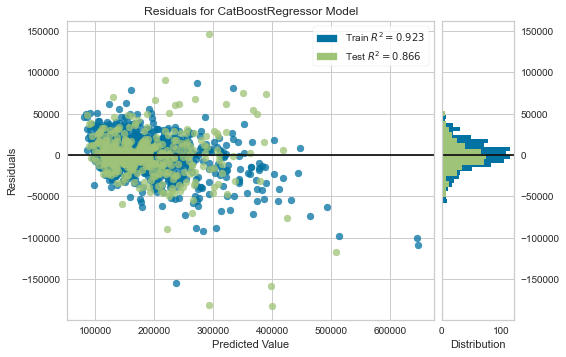

In [26]:
plot_model(tuned_catboost)

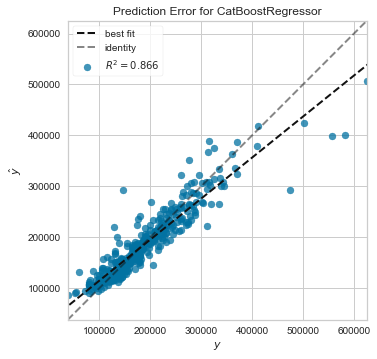

In [27]:
plot_model(tuned_catboost, plot = 'error')

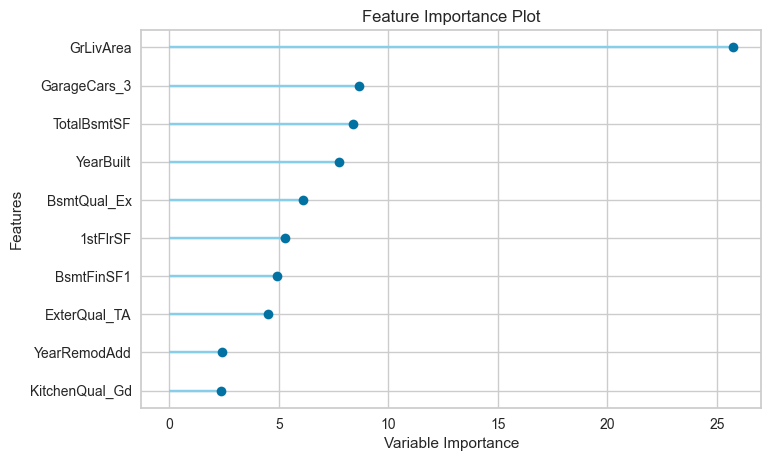

In [28]:
plot_model(tuned_catboost, plot='feature')

In [29]:
predict_model(tuned_catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,17226.4125,769538784.0197,27740.5621,0.8657,0.1428,0.1013


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,69.354309,9505.0,2001.0,2001.0,180.0,0.0,0.0,884.0,884.0,884.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,222500.0,222299.486459
1,60.000000,9600.0,1900.0,1950.0,0.0,0.0,0.0,1095.0,1095.0,1095.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,87000.0,133000.720982
2,32.000000,3363.0,2004.0,2004.0,117.0,0.0,0.0,976.0,976.0,976.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,130000.0,168480.527477
3,75.000000,9750.0,1998.0,1998.0,0.0,975.0,0.0,133.0,1108.0,1108.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,274300.0,230909.177014
4,60.000000,10930.0,1945.0,1950.0,0.0,580.0,0.0,333.0,913.0,1048.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,140000.0,142807.886085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,60.000000,6882.0,1914.0,2006.0,0.0,0.0,0.0,684.0,684.0,773.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,127000.0,117031.910050
435,50.000000,6000.0,1954.0,1954.0,0.0,0.0,0.0,811.0,811.0,811.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,93000.0,116404.862359
436,80.000000,10240.0,2005.0,2005.0,178.0,0.0,0.0,1030.0,1030.0,1038.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,275500.0,263791.901209
437,85.000000,10625.0,2003.0,2004.0,292.0,866.0,0.0,132.0,998.0,1006.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,284000.0,260904.625969


In [30]:
final_catboost = finalize_model(tuned_catboost)

In [31]:
test_predictions = predict_model(final_catboost, data=test)

In [32]:
test_predictions.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,122261.087565
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,155770.205601
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,187359.466445
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,183768.865090
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,180339.847297


In [37]:
test_predictions[["Id", "Label"]].rename(columns={"Id": "Id", "Label": "SalePrice"}).to_csv("my_submission.csv", index=False)